# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1136.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           4.00e-43
Time:                        19:52:48   Log-Likelihood:                 4.8978
No. Observations:                  50   AIC:                            -1.796
Df Residuals:                      46   BIC:                             5.852
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9428      0.078     63.401      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.44905198  4.92406562  5.36109131  5.73388231  6.02566418  6.23189081
  6.36099128  6.43298503  6.4761927   6.52258314  6.602521    6.73977794
  6.94762698  7.22666178  7.56469913  7.9387806   8.31894454  8.67314871
  8.97253471  9.19616936  9.33448392  9.39084626  9.38100749  9.3305141
  9.27051077  9.23262337  9.24376289  9.32170411  9.47216518  9.6878682
  9.94973492 10.23002127 10.49687562 10.71957191 10.87355785 10.94448881
 10.9305846  10.84292192 10.70361452 10.54217998 10.39069003 10.27850125
 10.22743191 10.24817725 10.33855228 10.48385082 10.6592616  10.83394477
 10.97609874 11.0581851 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.05036528 10.91513108 10.67136902 10.36211904 10.04403689  9.77352277
  9.5929126   9.52011276  9.5442159   9.62817153]


## Plot comparison

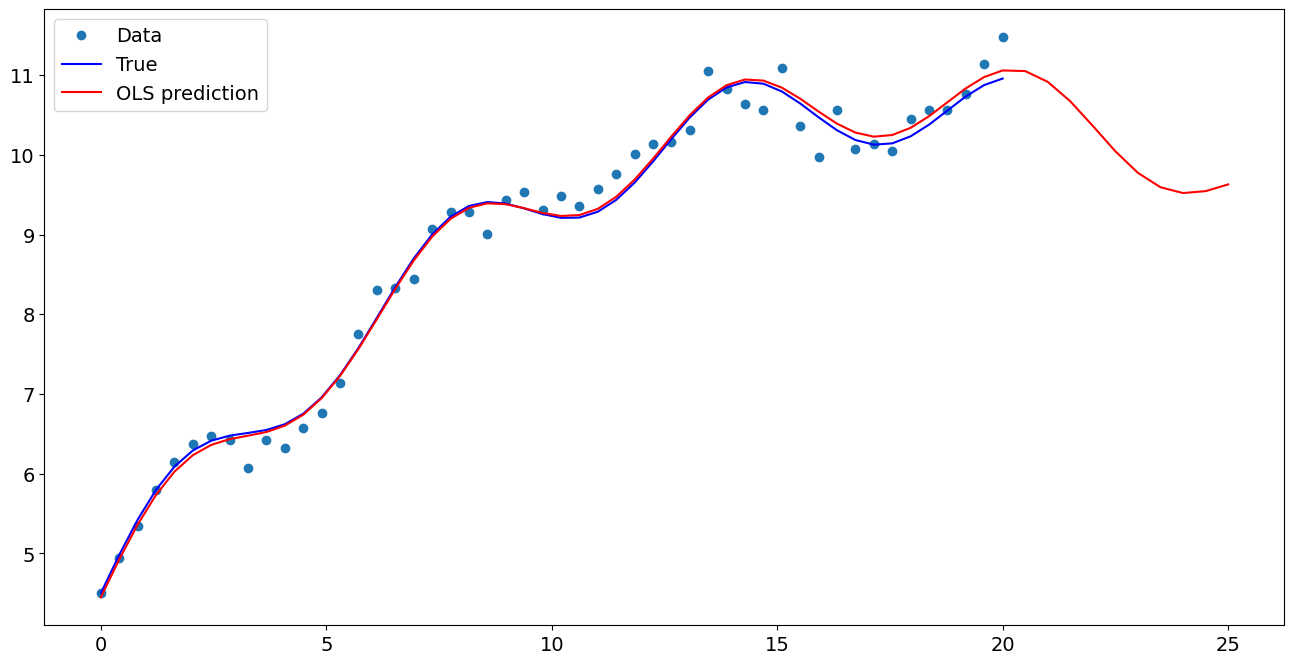

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.942845
x1                  0.505990
np.sin(x1)          0.481599
I((x1 - 5) ** 2)   -0.019752
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.050365
1    10.915131
2    10.671369
3    10.362119
4    10.044037
5     9.773523
6     9.592913
7     9.520113
8     9.544216
9     9.628172
dtype: float64